# Lecture 7a - Chi-Squared Test for Goodness-of-Fit

From DeGroot Chapter 10:

`In some problems, we have one specific distribution in mind for the data we will observe. If that one distribution is not appropriate, we do not necessarily have a parametric family of alternative distributions in mind. In these cases, and others, we can still test the null hypothesis that the data come from the one specific distribution against the alternative hypothesis that the data do not come from that distribution.`

The chi-squared test is typically used as a goodness-of-fit test. It is a formal method to determine how well a proposed model really fits the data we observe.

## Categorical Data

Suppose that a large population consists of items of $k$ different types.

Let $p_i$ denote the probability that an item selected at random will be of type $i$ where $i = 1, \ldots, k$.

Let $p_1^0, \ldots, p_k^0$ be specific numbers that represents our hypothesis regarding the probabilities. We wish to test the following:

\begin{align*}
    H_0 &: p_i = p_i^0 \ \ \ \text{for} \ i = 1, \ldots, k\\ 
    H_1 &: p_i \neq p_i^0 \ \ \ \text{for at least one} \ i
\end{align*}

Assume that a random sample of size $n$ is to be taken from the population.

Furthermore, let $N_i$ denote the number of observations in the random sample that are of type $i$. Thus,

\begin{align*}
    \sum_{i=1}^{k} N_i &= n
\end{align*}


## The Chi-Squared Statistic

The following statistic

\begin{align*}
    Q &= \sum_{i=1}^{k} \frac{(N_i - n p_i^0)^2}{n p_i^0}\\
    &= \sum_{i=1}^{k} \frac{(\text{observed}  - \text{expected})^2}{\text{expected}}
\end{align*}

has the property that if $H_0$ is true and the sample size $n \rightarrow \infty$, then $Q$ converges in distribution to the $\chi^2$ distribution with $k-1$ degrees of freedom.

This was proved by Karl Pearson in 1900.

## Example - Poll Data

The Bureau of Business and Economic Research at the University of Montana conducted a poll of opinions of Montana residents in May 1992.

Among other things, respondents were asked whether their personal financial status was worse, the same, or better than one year ago.

Here are some results of that poll:

| Worse |  Same | Better | Total |
| --- | --- | --- | ---: |
| 58 |  64 | 67 | 189 |

Suppose we were interested in whether the respondents' answers are uniformly distributed over the three possible responses.

We can set this up as a hypothesis testing problem. Specifically, we can use the Chi-Squared Test with the following hypotheses:

\begin{align*}
    H_0 &: p_i = \frac{1}{3} \ \ \ \text{for} \ i = 1, 2, 3\\ 
    H_1 &: p_i \neq \frac{1}{3} \ \ \ \text{for at least one} \ i
\end{align*}

Calculating $Q$ yields,

\begin{align*}
    Q &= \frac{(58 - 189/3)^2}{189/3} + \frac{(64 - 189/3)^2}{189/3} + \frac{(67 - 189/3)^2}{189/3}\\
    &= \frac{(58 - 63)^2}{63} + \frac{(64 - 63)^2}{63} + \frac{(67 - 63)^2}{63}\\
    &= \frac{2}{3} \approx 0.6667
\end{align*}

$Q$ here has 2 degrees of freedom since $k = 3$. 

We can then calculate the p-value using a $\chi^2$ table or using code:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

plt.rcParams['figure.figsize'] = [7.5, 7.5]

obs = [58, 64, 67]
total = np.sum(obs)
h0 = [1/3, 1/3, 1/3] # probability distribution over classes

k = 3
Q = 0
for i in range(k):
    Q = Q + ((obs[i] - total*h0[i])**2)/(total*h0[i])

p_value = 1 - chi2.cdf(Q, k - 1)
print('Chi-Squared Statistic:', Q)
print('p-value:', p_value)

Chi-Squared Statistic: 0.6666666666666666
p-value: 0.7165313105737892


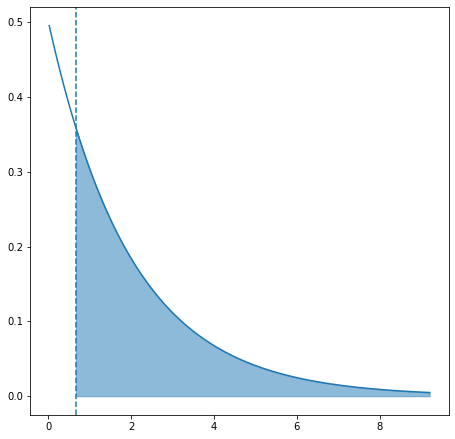

In [14]:
x = np.linspace(chi2.ppf(0.01, k - 1), chi2.ppf(0.99, k - 1), 100)
x_shade = np.linspace(Q, chi2.ppf(0.99, k - 1), 100)

plt.plot(x, chi2.pdf(x, k - 1), color='tab:blue')
plt.axvline(Q, color='tab:blue', linestyle='--')
plt.fill_between(x_shade, chi2.pdf(x_shade, k - 1), color='tab:blue', alpha=0.5)
plt.show()

Therefore, we would only reject the null at $\alpha$ levels greater than $0.717$.

---

Alternatively, suppose we were testing at $\alpha = 0.05$. We could calculate the chi-squared <b><i>critical value</b></i>:

In [15]:
alpha = 0.05
Q_crit = chi2.ppf(1 - alpha, k - 1)

print('Chi-Squared Critical Value:', Q_crit)

Chi-Squared Critical Value: 5.991464547107979


Since our statistic is much much lower than the critical value, i.e. $0.666 < 5.991$, we cannot reject the null hypothesis.

Therefore, we can conclude that the proposed model of "uniformly distributed over the three possible responses" is a good fit.

---

<i>Note: Usually we want to reject the null hypothesis. In this case however, we want to "accept" the null.</i>

---


## Score-Based Approach for Model Selection

For the example above, we could do multiple chi-squared tests on different proposed models. 

We could then choose the model that gives us the lowest chi-squared statistic $Q$ (or the highest p-value).

We'll return to this idea of a score-based model selection when we discuss the Kolmogorov–Smirnov test.

---

<i>Note: Other score-based methods include choosing models with the highest likelihood, e.g. Likelihood Ratio Test (LRT), Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC).</i>

---


## Example - Anomaly Detection

In the game rock-paper-scissors, Kenny expects to win, tie, and lose with equal frequency.

He plays the game often, but suspects that his opponent is cheating somehow.

He decides to use a statistical test to detect if there is cheating going on and collects the following data:

| Win |  Loss | Tie | Total |
| --- | --- | --- | ---: |
| 4 |  13 | 7 | 24 |

Following the example above, the hypotheses are:

\begin{align*}
    H_0 &: p_i = \frac{1}{3} \ \ \ \text{for} \ i = 1, 2, 3\\ 
    H_1 &: p_i \neq \frac{1}{3} \ \ \ \text{for at least one} \ i
\end{align*}

Calculating $Q$ yields,

\begin{align*}
    Q &= \frac{(4 - 24/3)^2}{24/3} + \frac{(13 - 24/3)^2}{24/3} + \frac{(7 - 24/3)^2}{24/3}\\
    &= \frac{(4 - 8)^2}{8} + \frac{(13 - 8)^2}{8} + \frac{(7 - 8)^2}{8}\\
    &= \frac{21}{4} = 5.25
\end{align*}

$Q$ here has 2 degrees of freedom since $k = 3$. 

From the previous example, we know that the chi-squared critical value is $5.991$ for $\alpha = 0.05$.

Thus, since $5.25 < 5.991$, we cannot reject the null hypothesis at this significance level.

In other words, we cannot say definitively that cheating is going on.

## Exercise - Blood Types

Suppose we collect data on the actual counts of people with the four basic blood types:

| A |  B | AB | O | Total |
| --- | --- | --- | --- | ---: |
| 2162 | 738 | 228 | 2876 | 6004

According to the DOH, the theoretical probabilities of blood types for Filipinos is given by:

| A |  B | AB | O |
| --- | --- | --- | --- |
| 1/3 | 1/8 | 1/24 | 1/2 |

Test the hypothesis that the theoretical probabilities are the probabilities with which the data we collected were sampled.